In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os

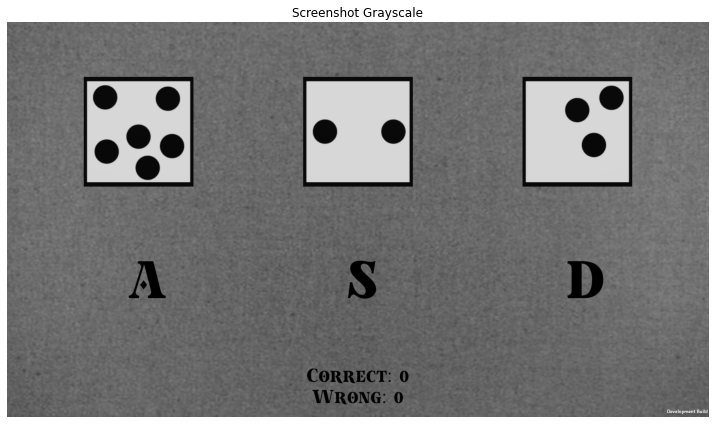

In [2]:
img_path = "screenshots/part1.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(img, cmap="gray")
axes.set_title("Screenshot Grayscale")
axes.axis("off")
plt.tight_layout()
plt.show()

In [3]:
def auto_canny(img, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(img)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(img, lower, upper)
	# return the edged image
	return edged

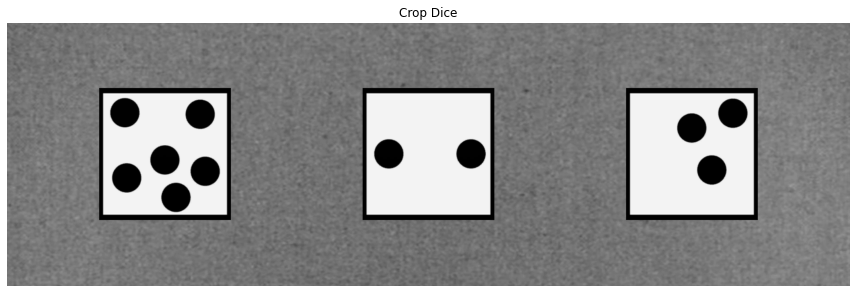

In [4]:
dice_top_left = (0, 0)    # w, h
dice_bot_right = (1920, 600)    # 1920 = 1 * width, 520 = 0.56 * height

dice = img[dice_top_left[1]:dice_bot_right[1], dice_top_left[0]:dice_bot_right[0]]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(dice, cmap="gray")
axes.set_title("Crop Dice")
axes.axis("off")
plt.tight_layout()
plt.show()

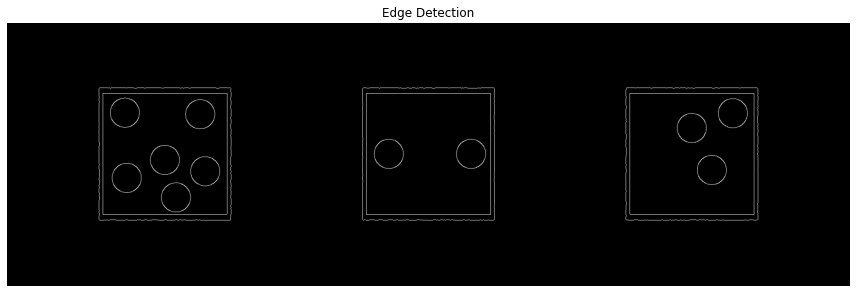

In [5]:
edged = auto_canny(dice)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(edged, cmap="gray")
axes.set_title("Edge Detection")
axes.axis("off")
plt.tight_layout()
plt.show()

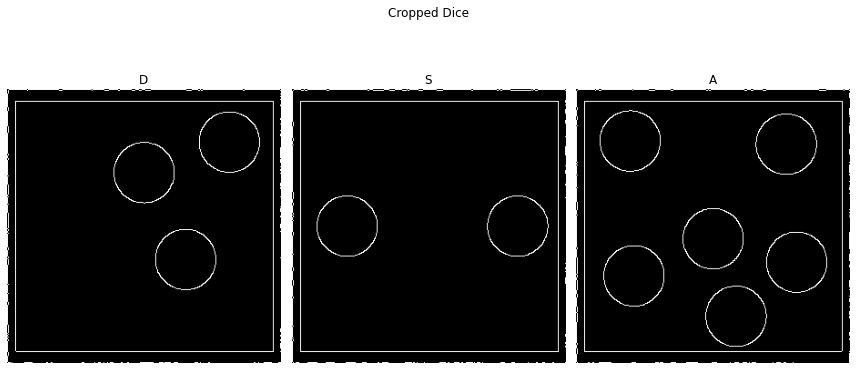

In [6]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cropped_die = []
for contour in contours:
    die_top_left = contour.min(axis=0)[0]
    die_bot_right = contour.max(axis=0)[0]
    cropped_die.append(edged[die_top_left[1]:die_bot_right[1], die_top_left[0]:die_bot_right[0]])
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
[axis.imshow(cropped_die[idx], cmap="gray") for idx, axis in enumerate(axes)]
[axis.axis("off") for axis in axes]
[axes[idx].set_title(title) for idx, title in enumerate(reversed(["A", "S", "D"]))]
fig.suptitle("Cropped Dice")
plt.tight_layout()
plt.show()

In [7]:
def number_of_circles(img):
    circle = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=100, param2=35, minRadius=0, maxRadius=0)
    return len(circle[0])

In [8]:
die_D = number_of_circles(cropped_die[0])
die_S = number_of_circles(cropped_die[1])
die_A = number_of_circles(cropped_die[2])

if die_A > die_S and die_A > die_D:
    print("Press A")
elif die_S > die_D:
    print("Press S")
else:
    print("Press D")

Press A


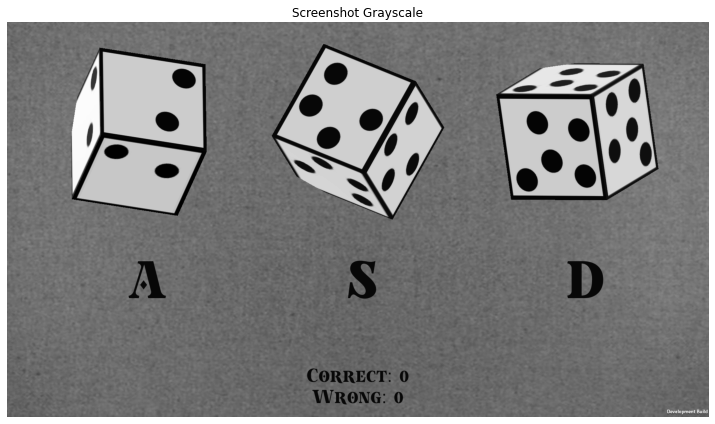

In [114]:
img_path = "screenshots/part2_4.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(img, cmap="gray")
axes.set_title("Screenshot Grayscale")
axes.axis("off")
plt.tight_layout()
plt.show()

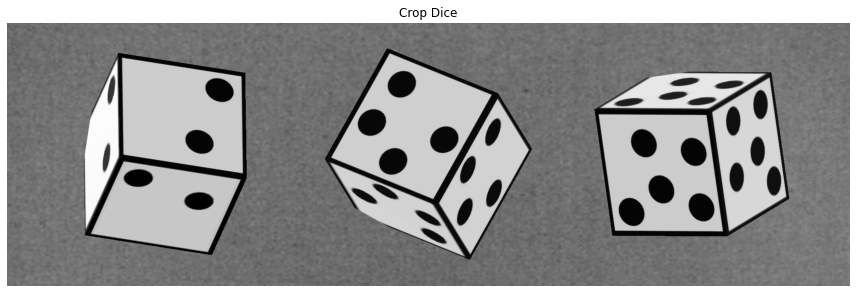

In [115]:
dice_top_left = (0, 0)    # w, h
dice_bot_right = (1920, 600)    # 1920 = 1 * width, 520 = 0.5 * height

dice = img[dice_top_left[1]:dice_bot_right[1], dice_top_left[0]:dice_bot_right[0]]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(dice, cmap="gray")
axes.set_title("Crop Dice")
axes.axis("off")
plt.tight_layout()
plt.show()

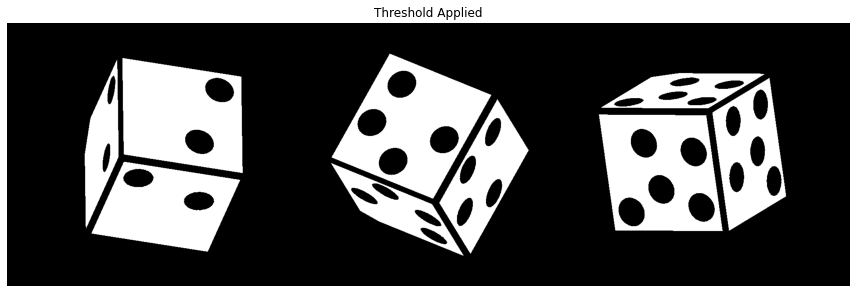

In [116]:
_, thresh = cv2.threshold(dice, 170, 255, cv2.THRESH_BINARY)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(thresh, cmap="gray")
axes.set_title("Threshold Applied")
axes.axis("off")
plt.tight_layout()
plt.show()

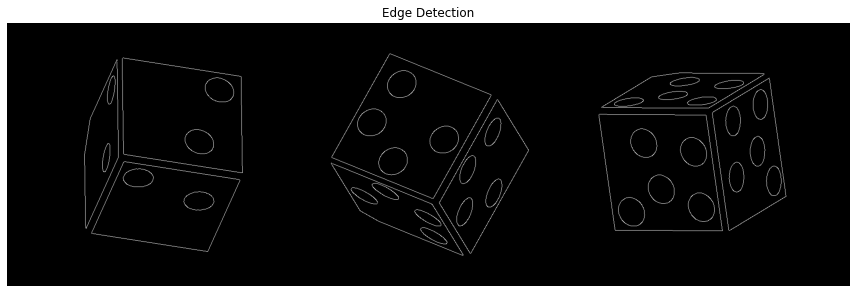

In [117]:
edged = auto_canny(thresh)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(edged, cmap="gray")
axes.set_title("Edge Detection")
axes.axis("off")
plt.tight_layout()
plt.show()

74761.5
68361.5
68142.0


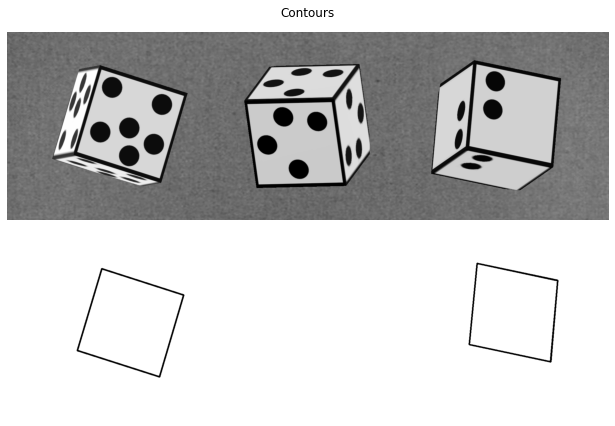

In [127]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
outlines, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outlines = sorted(outlines, key=cv2.contourArea, reverse=True)[:3]

new_contours = []
index = 0
prev_p = 0
while len(new_contours) < 3 and index < len(contours):
    # approximate the contour
    c = contours[index]
    perimeter = int(0.05*cv2.arcLength(c, True))
    approx = cv2.approxPolyDP(c, perimeter, True)
    if len(approx) == 4 and perimeter != prev_p:
        print(cv2.contourArea(approx))
        new_contours.append(approx)
        prev_p = perimeter
    index += 1

zeros = np.ones(dice.shape)
cv2.drawContours(zeros, new_contours, -1, (0, 255, 0), 3)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axes[0].imshow(dice, cmap="gray")
axes[1].imshow(zeros, cmap="gray")
fig.suptitle("Contours")
[axis.axis("off") for axis in axes]
plt.tight_layout()
plt.show()

In [ ]:
from os import listdir
from os.path import isfile, join
path = "screenshots"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

for img_p in onlyfiles:
    img_path = path + "/" + img_p
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    dice_top_left = (0, 0)    # w, h
    dice_bot_right = (1920, 600)    # 1920 = 1 * width, 520 = 0.5 * height

    dice = img[dice_top_left[1]:dice_bot_right[1], dice_top_left[0]:dice_bot_right[0]]
    _, thresh = cv2.threshold(dice, 170, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    new_contours = []
    index = 0

    while len(new_contours) < 3 and index < len(contours):
        c = contours[index]
        c_area = cv2.contourArea(c) > 50000
        if c_area:
            new_contours.append(c)
        index += 1

    zeros = np.ones(dice.shape)
    cv2.drawContours(zeros, new_contours, -1, (0, 255, 0), 3)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
    axes[0].imshow(dice, cmap="gray")
    axes[1].imshow(zeros, cmap="gray")
    fig.suptitle("Contours")
    [axis.axis("off") for axis in axes]
    plt.tight_layout()
    plt.show()

In [275]:
img_path = "screenshots/ss/img_16.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
dice_top_left = (0, 0)    # w, h
dice_bot_right = (1920, 600)    # 1920 = 1 * width, 520 = 0.5 * height

dice = img[dice_top_left[1]:dice_bot_right[1], dice_top_left[0]:dice_bot_right[0]]
_, thresh = cv2.threshold(dice, 170, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
die_faces = []
index = 0

while len(die_faces) < 3 and index < len(contours):
    c = contours[index]
    c_area = cv2.contourArea(c) > 50000
    if c_area:
        die_faces.append(c)
    index += 1

In [237]:
# %matplotlib qt
# zeros = np.ones(dice.shape)
# cv2.drawContours(zeros, die_faces, -1, (0, 255, 0), 3)

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
# axes[0].imshow(dice, cmap="gray")
# axes[1].imshow(zeros, cmap="gray")
# fig.suptitle("Contours")
# [axis.axis("off") for axis in axes]
# plt.tight_layout()
# plt.show()

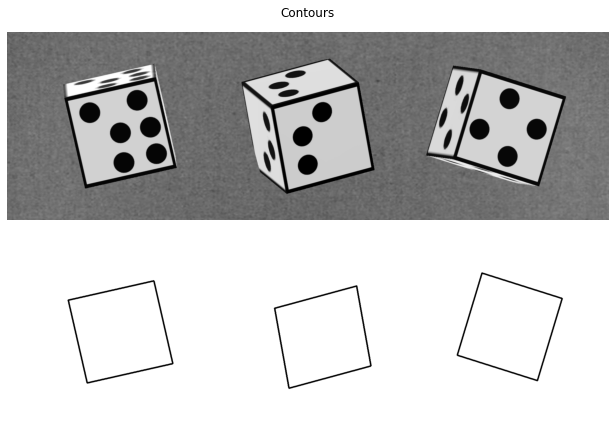

In [276]:
%matplotlib inline
zeros = np.ones(dice.shape)
cv2.drawContours(zeros, die_faces, -1, (0, 255, 0), 3)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axes[0].imshow(dice, cmap="gray")
axes[1].imshow(zeros, cmap="gray")
fig.suptitle("Contours")
[axis.axis("off") for axis in axes]
plt.tight_layout()
plt.show()

In [285]:
def warp_die(img, rect):
    tl, tr, br, bl = rect

    width_A = np.sqrt(np.power((br[0] - bl[0]), 2) + np.power((br[1] - bl[1]), 2))
    width_B = np.sqrt(np.power((tr[0] - tl[0]), 2) + np.power((tr[1] - tl[1]), 2))
    max_w = max(int(width_A), int(width_B))

    height_A = np.sqrt(np.power((tr[0] - br[0]), 2) + np.power((tr[1] - br[1]), 2))
    height_B = np.sqrt(np.power((tl[0] - bl[0]), 2) + np.power((tl[1] - bl[1]), 2))
    max_h = max(int(height_A), int(height_B))

    dst = np.array([[0, 0], [max_w - 1, 0], [max_w - 1, max_h - 1], [0, max_h - 1]], dtype=np.float32)

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(img, M, (max_w, max_h))
    return warped

In [286]:
def die_locations(i):
    return i[1]

In [287]:
numbers_on_faces = []
for face_contour in die_faces:
    face_cntr = face_contour[:, 0, :]
    top_left = face_cntr[face_cntr.sum(axis=1).argmin()]
    top_right = face_cntr[(face_cntr.T[0] - face_cntr.T[1]).argmax()]
    bot_right = face_cntr[face_cntr.sum(axis=1).argmax()]
    bot_left = face_cntr[(face_cntr.T[0] - face_cntr.T[1]).argmin()]
    points = np.vstack((top_left, top_right, bot_right, bot_left)).astype(np.float32)
    warped_die = warp_die(thresh, points)
    no_points = len(cv2.HoughCircles(warped_die, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=20, minRadius=0, maxRadius=0)[0])
    numbers_on_faces.append((no_points, top_left[0]))

die_A, die_S, die_D = sorted(numbers_on_faces, key=die_locations)

In [288]:
die_D = number_of_circles(cropped_die[0])
die_S = number_of_circles(cropped_die[1])
die_A = number_of_circles(cropped_die[2])

if die_A > die_S and die_A > die_D:
    print("Press A")
elif die_S > die_D:
    print("Press S")
else:
    print("Press D")

Press A
